# Finite Difference Method

## Example 1. 

The rocket problem is described by the following ODE:
$$\frac{d^2y}{dx^2} = -g,\;x \in (0,5)$$
subject to essential boundary conditions $y(0)=0$ and $y(5)=50$.<br>

Solve the problem using the FDM and plot the altitude of the rocket after launching for $n=10$.<br>
## FD Formulation

Since the time interval is $[0,5]$ and we have $n=10$, therefore, $h=0.5$, using the finite difference approximated derivatives, we have
$$y_0 = 0$$
$$y_{i-1}-2y_i+y_{i+1} = -gh^2,\;i=1,2,...,n-1$$
$$y_{10} =50$$

## Write matrix notation and python program to solve the above problem

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


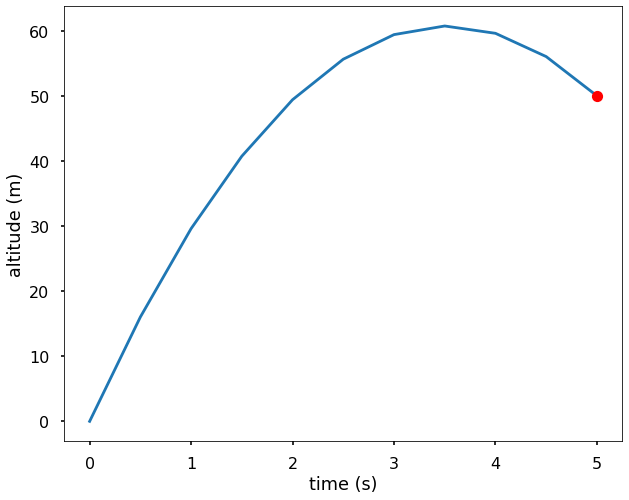

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

## Example 2.

The following linear BVP  

$$y" = -4y + 4x $$

subject to the boundary conditions $y(0)=0$ and $y′(π/2)=0$ has the exact solution $y=x−sin2x$. 

Find approximate solution using FDM and plot the errors against the n grid points (n from 3 to 100) for the boundary point $y(π/2)$.

## FD Formulation

Using the finite difference approximated derivatives: $\frac{dy}{dx}=\frac{y_{i+1}-y_{i-1}}{2h},\;\;\frac{d^2y}{dx^2}=\frac{y_{i+1}-2y_i+y_{i-1}}{h^2}$, we have
$$y_0=0$$
$$y_{i-1}-2y_i+y_{i+1}-h^2(-4y_i+4x_i) = 0,\;i=1,2,...,n-1$$
$$2y_{n-1}-2y_n-h^2(-4y_n+4x_n)=0  $$



## Write matrix notation and python program to solve the above problem

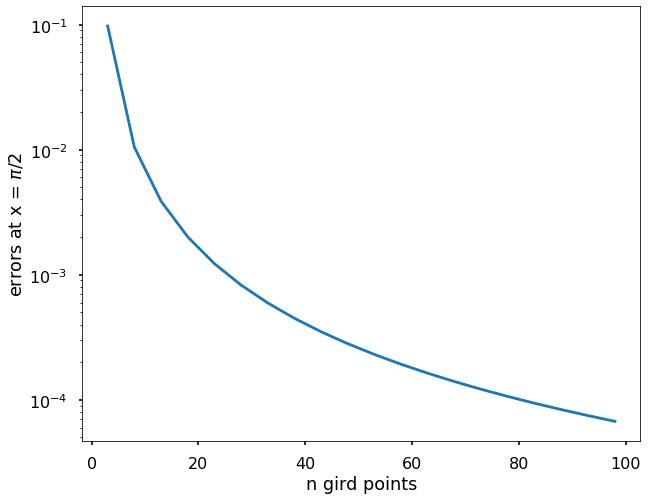

In [2]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

## Installation of diffeqpy

Step 1:  pip install diffeqpy

https://pypi.org/project/diffeqpy/   

Step 2: Using diffeqpy requires that Julia is installed and in the path, along with DifferentialEquations.jl and PyCall.jl. To install Julia, download a generic binary from the JuliaLang site (https://julialang.org/downloads/) and add it to your path. To install Julia packages required for diffeqpy, open up Python interpreter then run:

`>>> import julia`<br>
`>>> julia.install()` <br>

diffeqpy is a package for solving differential equations in Python. It utilizes DifferentialEquations.jl for its core routines to give high performance solving of many different types of differential equations, including:

1. Discrete equations (function maps, discrete stochastic (Gillespie/Markov) simulations)
2. Ordinary differential equations (ODEs)
3. Split and Partitioned ODEs (Symplectic integrators, IMEX Methods)
4. Stochastic ordinary differential equations (SODEs or SDEs)
5. Random differential equations (RODEs or RDEs)
6. Differential algebraic equations (DAEs)
7. Delay differential equations (DDEs)
8. Mixed discrete and continuous equations (Hybrid Equations, Jump Diffusions)

Installation Step: on the terminal prompt
PS C:Users\working-directory> pip install diffeqpy
PS C:Users\working-directory>pip install diffeqpy
PS C:Users\working-directory>diffeqpy.install()
PS C:Users\working-directory>pip install numba



## Example: 1-D ODEs

In [4]:
from diffeqpy import de

ModuleNotFoundError: No module named 'diffeqpy'

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
def f(u,p,t):
    return -u

In [7]:
u0 = 0.5
tspan = (0., 1.)
prob = de.ODEProblem(f, u0, tspan)
sol = de.solve(prob)

NameError: name 'de' is not defined

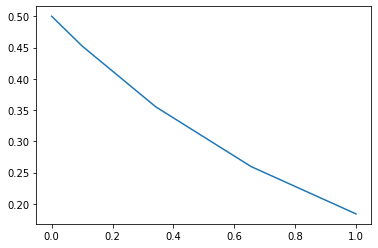

In [6]:
plt.plot(sol.t,sol.u)
plt.show()

Example 2:  Systems of ODEs: Lorenz Equations

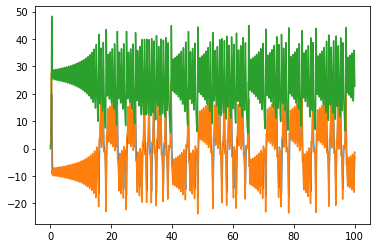

In [7]:
def f(u,p,t):
    x, y, z = u
    sigma, rho, beta = p
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

u0 = [1.0,0.0,0.0]
tspan = (0., 100.)
p = [10.0,28.0,8/3]
prob = de.ODEProblem(f, u0, tspan, p)
sol = de.solve(prob,saveat=0.01)

plt.plot(sol.t,sol.u)
plt.show()

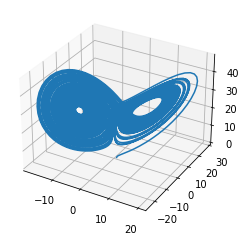

In [9]:
# The phase plot
ut = np.transpose(sol.u)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ut[0,:],ut[1,:],ut[2,:])
plt.show()

# Stochastic Differential Equation (SDE) Examples

## One-dimensional SDEs


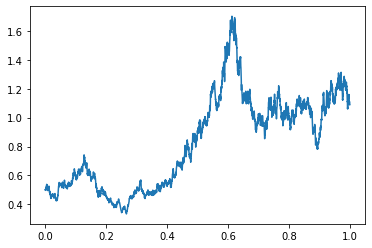

In [12]:
def f(u,p,t):
  return 1.01*u

def g(u,p,t):
  return 0.87*u

u0 = 0.5
tspan = (0.0,1.0)
prob = de.SDEProblem(f,g,u0,tspan)
sol = de.solve(prob,reltol=1e-3,abstol=1e-3)

plt.plot(sol.t,sol.u)
plt.show()

## Systems of SDEs with Diagonal Noise

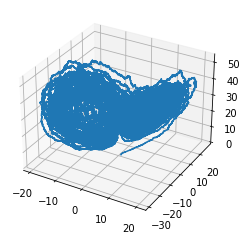

In [15]:
import numba

def f(du,u,p,t):
    x, y, z = u
    sigma, rho, beta = p
    du[0] = sigma * (y - x)
    du[1] = x * (rho - z) - y
    du[2] = x * y - beta * z

def g(du,u,p,t):
    du[0] = 0.3*u[0]
    du[1] = 0.3*u[1]
    du[2] = 0.3*u[2]

numba_f = numba.jit(f)
numba_g = numba.jit(g)
u0 = [1.0,0.0,0.0]
tspan = (0., 100.)
p = [10.0,28.0,2.66]
prob = de.SDEProblem(numba_f, numba_g, u0, tspan, p)
sol = de.solve(prob)

# Now let's draw a phase plot

ut = np.transpose(sol.u)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ut[0,:],ut[1,:],ut[2,:])
plt.show()

## Differential-Algebraic Equation (DAE) Examples

A differential-algebraic equation is defined by an implicit function f(du,u,p,t)=0. All of the controls are the same as the other examples, except here you define a function which returns the residuals for each part of the equation to define the DAE. The initial value u0 and the initial derivative du0 are required, though they do not necessarily have to satisfy f (known as inconsistent initial conditions). The methods will automatically find consistent initial conditions. In order for this to occur, differential_vars must be set. This vector states which of the variables are differential (have a derivative term), with false meaning that the variable is purely algebraic.

This example shows how to solve the Robertson equation:

In [16]:
def f(du,u,p,t):
  resid1 = - 0.04*u[0]               + 1e4*u[1]*u[2] - du[0]
  resid2 = + 0.04*u[0] - 3e7*u[1]**2 - 1e4*u[1]*u[2] - du[1]
  resid3 = u[0] + u[1] + u[2] - 1.0
  return [resid1,resid2,resid3]

u0 = [1.0, 0.0, 0.0]
du0 = [-0.04, 0.04, 0.0]
tspan = (0.0,100000.0)
differential_vars = [True,True,False]
prob = de.DAEProblem(f,du0,u0,tspan,differential_vars=differential_vars)
sol = de.solve(prob)

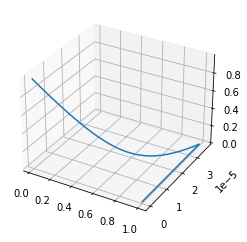

In [18]:
# Now let's draw a phase plot

ut = np.transpose(sol.u)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ut[0,:],ut[1,:],ut[2,:])
plt.show()

In [20]:
def f(resid,du,u,p,t):
  resid[0] = - 0.04*u[0]               + 1e4*u[1]*u[2] - du[0]
  resid[1] = + 0.04*u[0] - 3e7*u[1]**2 - 1e4*u[1]*u[2] - du[1]
  resid[2] = u[0] + u[1] + u[2] - 1.0

numba_f = numba.jit(f)
prob = de.DAEProblem(numba_f,du0,u0,tspan,differential_vars=differential_vars)
sol = de.solve(prob)

<ipython-input-20-f46162d241ee>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "f" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-20-f46162d241ee> (2)

File "<ipython-input-20-f46162d241ee>", line 2:
def f(resid,du,u,p,t):
  resid[0] = - 0.04*u[0]               + 1e4*u[1]*u[2] - du[0]
  ^

  def f(resid,du,u,p,t):
c:\Users\226167G\Documents\GitHub\FEM-WORKSHOP\venv\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "f" was compiled in object mode without forceobj=True.

File "<ipython-input-20-f46162d241ee>", line 1:
def f(resid,du,u,p,t):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
c:\Users\226167G\Documents\GitHub\FEM-WORKSHOP\venv\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

Fo

## Delay Differential Equations

A delay differential equation is an ODE which allows the use of previous values. In this case, the function needs to be a JIT compiled Julia function. It looks just like the ODE, except in this case there is a function h(p,t) which allows you to interpolate and grab previous values.

We must provide a history function h(p,t) that gives values for u before t0. Here we assume that the solution was constant before the initial time point. Additionally, we pass constant_lags = [20.0] to tell the solver that only constant-time lags were used and what the lag length was. This helps improve the solver accuracy by accurately stepping at the points of discontinuity. Together this is:

In [21]:
f = Main.eval("""
function f(du, u, h, p, t)
  du[1] = 1.1/(1 + sqrt(10)*(h(p, t-20)[1])^(5/4)) - 10*u[1]/(1 + 40*u[2])
  du[2] = 100*u[1]/(1 + 40*u[2]) - 2.43*u[2]
end""")
u0 = [1.05767027/3, 1.030713491/3]

h = Main.eval("""
function h(p,t)
  [1.05767027/3, 1.030713491/3]
end
""")

tspan = (0.0, 100.0)
constant_lags = [20.0]
prob = de.DDEProblem(f,u0,h,tspan,constant_lags=constant_lags)
sol = de.solve(prob,saveat=0.1)

u1 = [sol.u[i][0] for i in range(0,len(sol.u))]
u2 = [sol.u[i][1] for i in range(0,len(sol.u))]

import matplotlib.pyplot as plt
plt.plot(sol.t,u1)
plt.plot(sol.t,u2)
plt.show()

NameError: name 'Main' is not defined